## Importing libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

C:\Users\praga\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data Exploration

In [5]:
df = pd.read_csv("/Users/praga/Downloads/breast-cancer-wisconsin.data.csv",header=None,names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])


In [6]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df.shape

(699, 11)

In [9]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [10]:
df=df.replace('?',np.nan)

### Null Values

In [11]:
df.isnull().sum()[df.isnull().sum()!=0]

Bare Nuclei    16
dtype: int64

In [12]:
df=df.dropna(axis=0)

In [13]:
df.shape

(683, 11)

In [14]:
status_replace = {
    "Class" : {
        2: 1,
        4: 0
    }
}

df = df.replace(status_replace)

In [15]:
df['Class'].value_counts()

1    444
0    239
Name: Class, dtype: int64

Here 0 represents benign tumor and 1 represents malignant

## Data Analysis

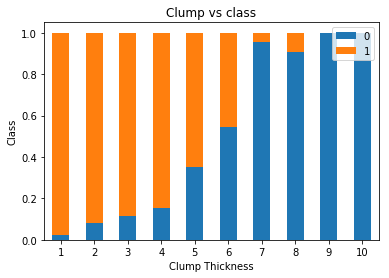

In [16]:
table=pd.crosstab(df['Clump Thickness'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Clump vs class')
plt.xlabel('Clump Thickness')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

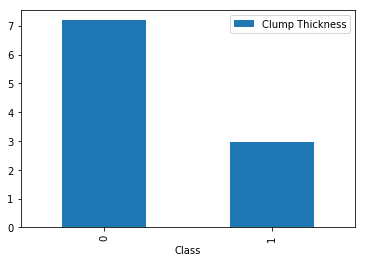

In [17]:
pivot = df.pivot_table(values='Clump Thickness',index='Class')
pivot.plot.bar()
plt.show()

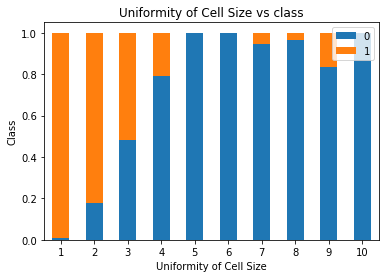

In [18]:
table=pd.crosstab(df['Uniformity of Cell Size'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Uniformity of Cell Size vs class')
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

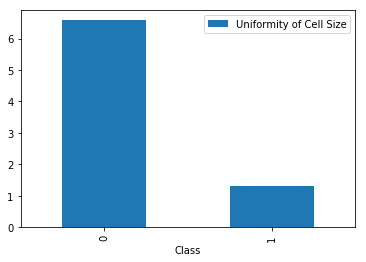

In [19]:
pivot = df.pivot_table(values='Uniformity of Cell Size',index='Class')
pivot.plot.bar()
plt.show()

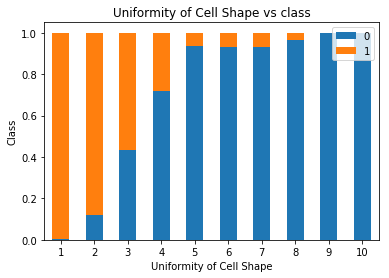

In [20]:
table=pd.crosstab(df['Uniformity of Cell Shape'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Uniformity of Cell Shape vs class')
plt.xlabel('Uniformity of Cell Shape')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

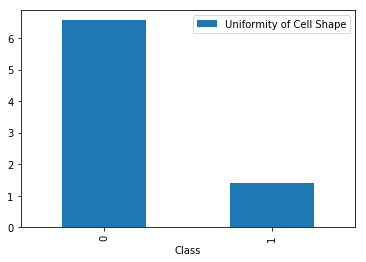

In [21]:
pivot = df.pivot_table(values='Uniformity of Cell Shape',index='Class')
pivot.plot.bar()
plt.show()

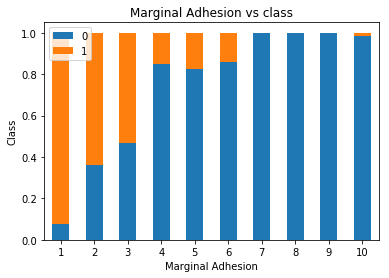

In [22]:
table=pd.crosstab(df['Marginal Adhesion'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Marginal Adhesion vs class')
plt.xlabel('Marginal Adhesion')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

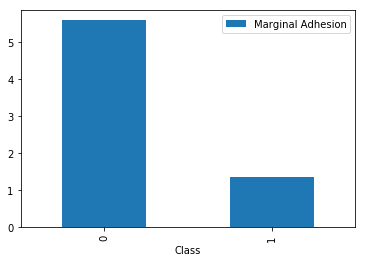

In [23]:
pivot = df.pivot_table(values='Marginal Adhesion',index='Class')
pivot.plot.bar()
plt.show()

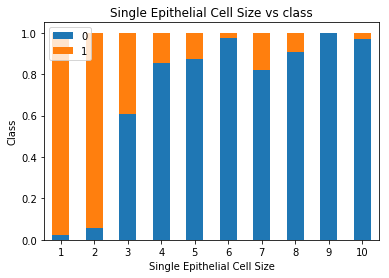

In [24]:
table=pd.crosstab(df['Single Epithelial Cell Size'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Single Epithelial Cell Size vs class')
plt.xlabel('Single Epithelial Cell Size')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

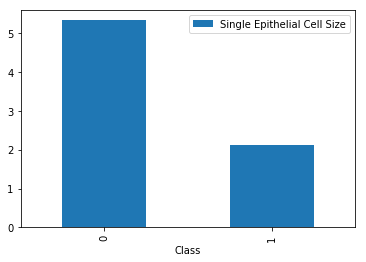

In [25]:
pivot = df.pivot_table(values='Single Epithelial Cell Size',index='Class')
pivot.plot.bar()
plt.show()

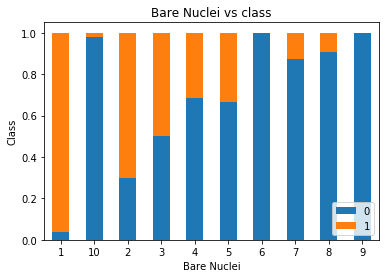

In [26]:
table=pd.crosstab(df['Bare Nuclei'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Bare Nuclei vs class')
plt.xlabel('Bare Nuclei')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

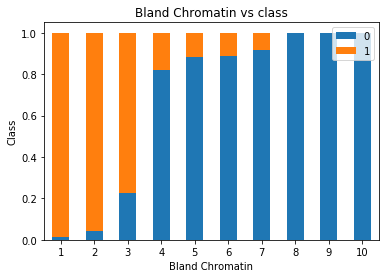

In [27]:
table=pd.crosstab(df['Bland Chromatin'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Bland Chromatin vs class')
plt.xlabel('Bland Chromatin')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

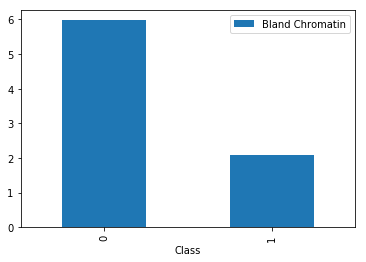

In [28]:
pivot = df.pivot_table(values='Bland Chromatin',index='Class')
pivot.plot.bar()
plt.show()

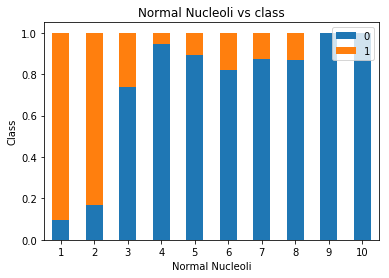

In [29]:
table=pd.crosstab(df['Normal Nucleoli'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Normal Nucleoli vs class')
plt.xlabel('Normal Nucleoli')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='best')

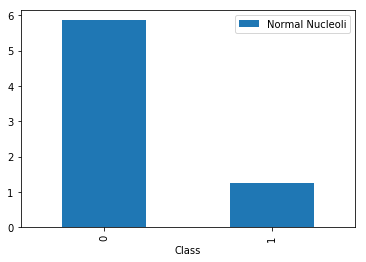

In [30]:
pivot = df.pivot_table(values='Normal Nucleoli',index='Class')
pivot.plot.bar()
plt.show()

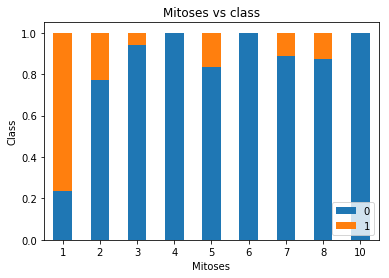

In [31]:
table=pd.crosstab(df['Mitoses'],df['Class'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Mitoses vs class')
plt.xlabel('Mitoses')
plt.ylabel('Class')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

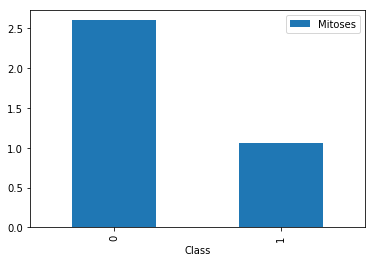

In [32]:
pivot = df.pivot_table(values='Mitoses',index='Class')
pivot.plot.bar()
plt.show()

## Correlation Matrix

In [33]:
corrmat=df.corr()

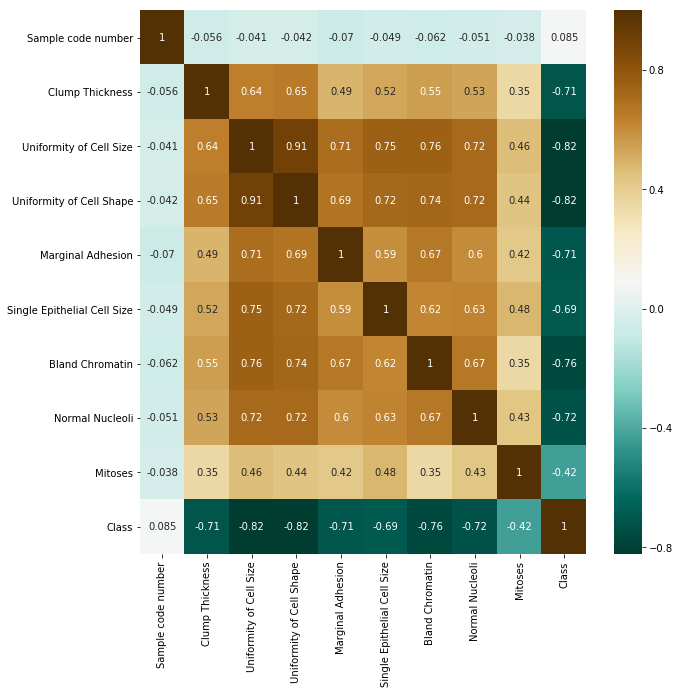

In [34]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat,annot=True,cmap='BrBG_r')

## Predicting Class

In [35]:
x=df.drop(['Class','Sample code number'],axis=1)
y=df['Class']
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [36]:
lr = LogisticRegression()
selector = RFECV(lr,cv=10)
selector.fit(x,y)

optimized_columns = x.columns[selector.support_]

In [37]:
penalty={
    1:1,
    0:3
    
}
lr = LogisticRegression()
x=df[optimized_columns]
y=df['Class']
params={
    "class_weight":['balanced',penalty],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[200,500,1000]
}
grid = GridSearchCV(lr, param_grid=params, cv=10)
grid.fit(x,y)

print(grid.best_params_)
print(grid.best_score_)
best_lr = grid.best_estimator_

C:\Users\praga\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'solver': 'saga', 'max_iter': 200, 'class_weight': {0: 3, 1: 1}}
0.9751098096632503


In [38]:
y_pred=best_lr.predict(x)

In [43]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       239
          1       0.99      0.97      0.98       444

avg / total       0.98      0.98      0.98       683



In [44]:
print(confusion_matrix(y,y_pred))

[[236   3]
 [ 12 432]]


In [45]:
tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
tn, fp, fn, tp

(236, 3, 12, 432)

In [46]:
from sklearn.cross_validation import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, random_state=42)

#### Logistic Regression with splitting of data

In [47]:
penalty={
    1:1,
    0:5
    
}
lr = LogisticRegression()

params={
    "class_weight":['balanced',penalty],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[200,500,1000]
}
grid = GridSearchCV(lr, param_grid=params, cv=10)
grid.fit(xtrain,ytrain)

print(grid.best_params_)
print(grid.best_score_)
best_lr = grid.best_estimator_

{'solver': 'sag', 'max_iter': 500, 'class_weight': 'balanced'}
0.9765625


In [48]:
y_pred=best_lr.predict(xtest)

In [51]:
print("Accuracy on training set: {:.3f}".format(best_lr.score(xtrain,ytrain)))
print("Accuracy on test set: {:.3f}".format(best_lr.score(xtest,ytest)))

Accuracy on training set: 0.979
Accuracy on test set: 0.965


In [52]:
print(classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95        60
          1       0.98      0.96      0.97       111

avg / total       0.97      0.96      0.97       171



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,y_pred))

[[ 58   2]
 [  4 107]]


In [54]:
 tn, fp, fn, tp = confusion_matrix(ytest,y_pred).ravel()

In [55]:
tn, fp, fn, tp 

(58, 2, 4, 107)

### k Nearest Neighbors

In [56]:
knn = KNeighborsClassifier()

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['auto','brute','ball_tree','kd_tree'],
    "p": [2,3,4]
}
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(x, y)

print(grid.best_params_)
print(grid.best_score_)
best_knn = grid.best_estimator_

{'n_neighbors': 13, 'weights': 'uniform', 'algorithm': 'auto', 'p': 2}
0.972181551976574


In [57]:
y_pred=best_knn.predict(x)

In [58]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       239
          1       0.98      0.98      0.98       444

avg / total       0.97      0.97      0.97       683



In [59]:
tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
tn, fp, fn, tp 

(228, 11, 8, 436)

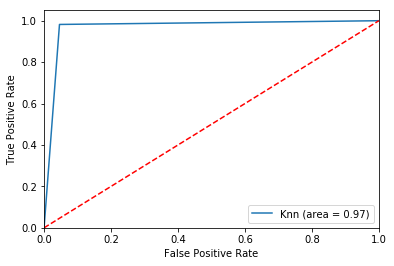

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y,y_pred)
fpr, tpr, thresholds = roc_curve(y, best_knn.predict(x))
plt.figure()
plt.plot(fpr, tpr, label='Knn (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### k Nearest Neighbors with dataframe split

In [61]:
knn = KNeighborsClassifier()

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['auto','brute'],
    "p": [2,3,4]
}
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(xtrain, ytrain)

print(grid.best_params_)
print(grid.best_score_)
best_knn = grid.best_estimator_

{'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'auto', 'p': 3}
0.974609375


In [62]:
y_pred=best_knn.predict(xtest)
print(classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94        60
          1       0.98      0.95      0.97       111

avg / total       0.96      0.96      0.96       171



In [63]:
print("Accuracy on training set: {:.3f}".format(best_knn.score(xtrain,ytrain)))
print("Accuracy on test set: {:.3f}".format(best_knn.score(xtest,ytest)))

Accuracy on training set: 0.975
Accuracy on test set: 0.959


In [64]:
tn, fp, fn, tp = confusion_matrix(ytest,y_pred).ravel()
tn, fp, fn, tp 

(58, 2, 5, 106)

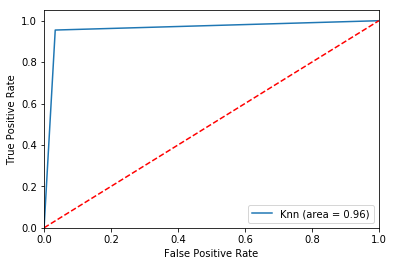

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest,y_pred)
fpr, tpr, thresholds = roc_curve(ytest, best_knn.predict(xtest))
plt.figure()
plt.plot(fpr, tpr, label='Knn (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest

In [81]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ['auto',"log2", "sqrt"],
                   "min_samples_leaf": [3, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)

grid.fit(x,y)

best_params = grid.best_params_
best_score = grid.best_score_

best_rand=grid.best_estimator_

In [82]:
best_rand

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [83]:
best_rand=grid.best_estimator_
y_pred=best_rand.predict(x)

In [84]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       239
          1       0.99      0.98      0.99       444

avg / total       0.98      0.98      0.98       683



In [85]:
tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
tn, fp, fn, tp 

(236, 3, 10, 434)

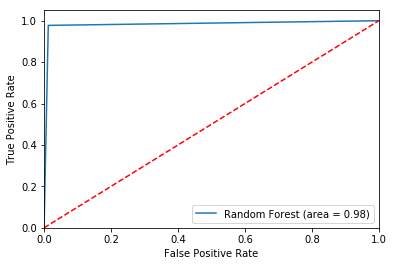

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y,y_pred)
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Random Forest with dataframe split

In [87]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ['auto',"log2", "sqrt"],
                   "min_samples_leaf": [3, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)

grid.fit(xtrain,ytrain)

best_params = grid.best_params_
best_score = grid.best_score_
best_rand=grid.best_estimator_
best_rand


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [88]:
y_pred=best_rand.predict(xtest)

In [89]:
print("Accuracy on training set: {:.3f}".format(best_rand.score(xtrain,ytrain)))
print("Accuracy on test set: {:.3f}".format(best_rand.score(xtest,ytest)))

Accuracy on training set: 0.979
Accuracy on test set: 0.959


In [90]:
print(classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94        60
          1       0.98      0.95      0.97       111

avg / total       0.96      0.96      0.96       171



In [91]:
tn, fp, fn, tp = confusion_matrix(ytest,y_pred).ravel()
tn, fp, fn, tp 

(58, 2, 5, 106)

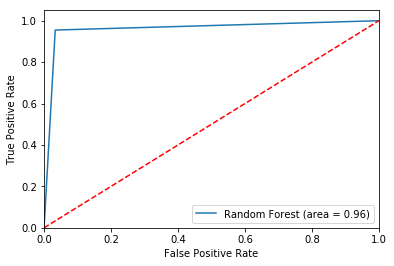

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest,y_pred)
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()